In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
#check missing values
df.isna().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum() #this data has no duplicates

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking no. of unique values in each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

1.From above description of numerical data, all means are very close to each other - between 66 and 68.05;

2.All standard deviations are also close - between 14.6 and 15.19;

3.While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [11]:
#exploring data

print("Categories in 'gender' variable:",end=" ")
print(df["gender"].unique())

print("Categories in 'race_ethnicity' variable:",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [13]:
#adding columns for total score and average 
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights

1.From above values we get students have performed the worst in Maths

2.Best performance is in reading section

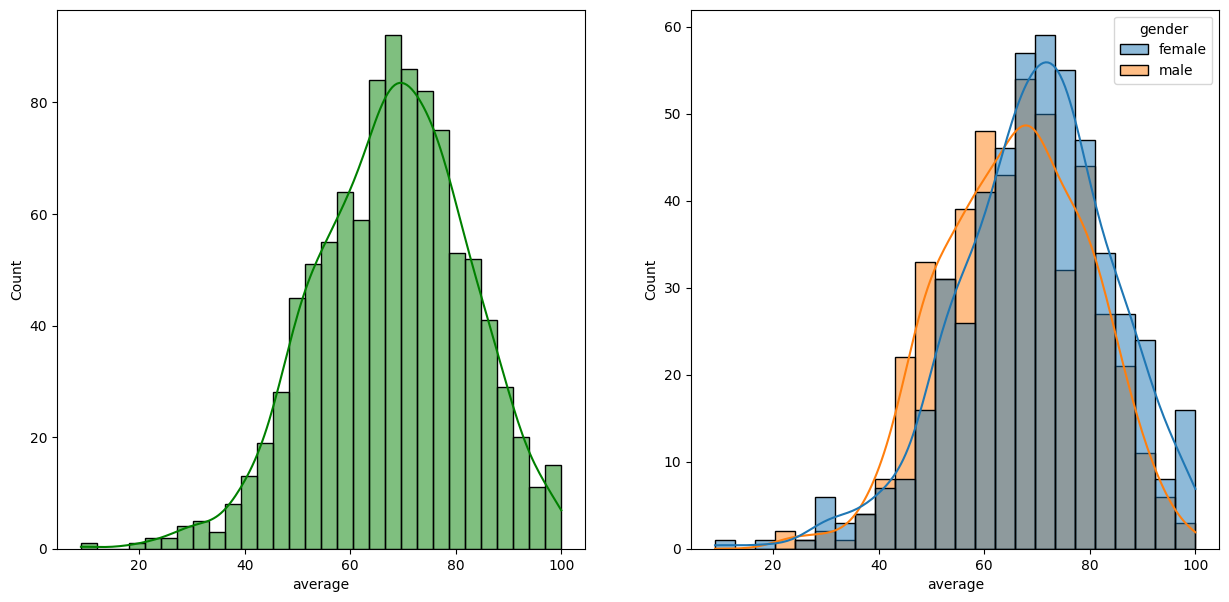

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

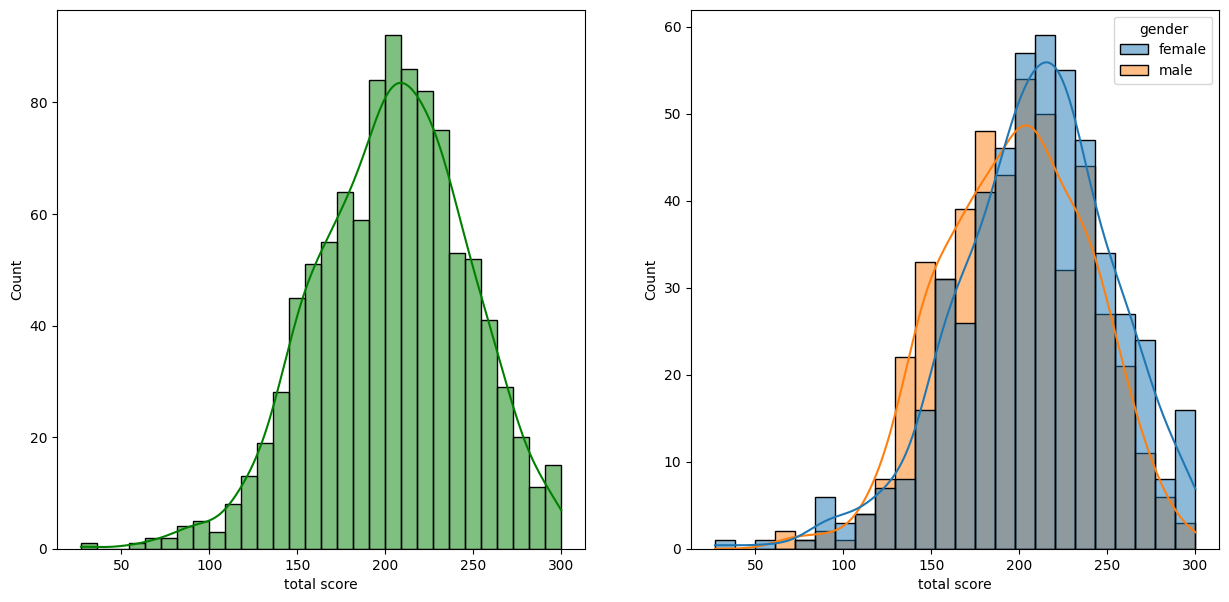

In [23]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights

Female students tend to perform well then male students

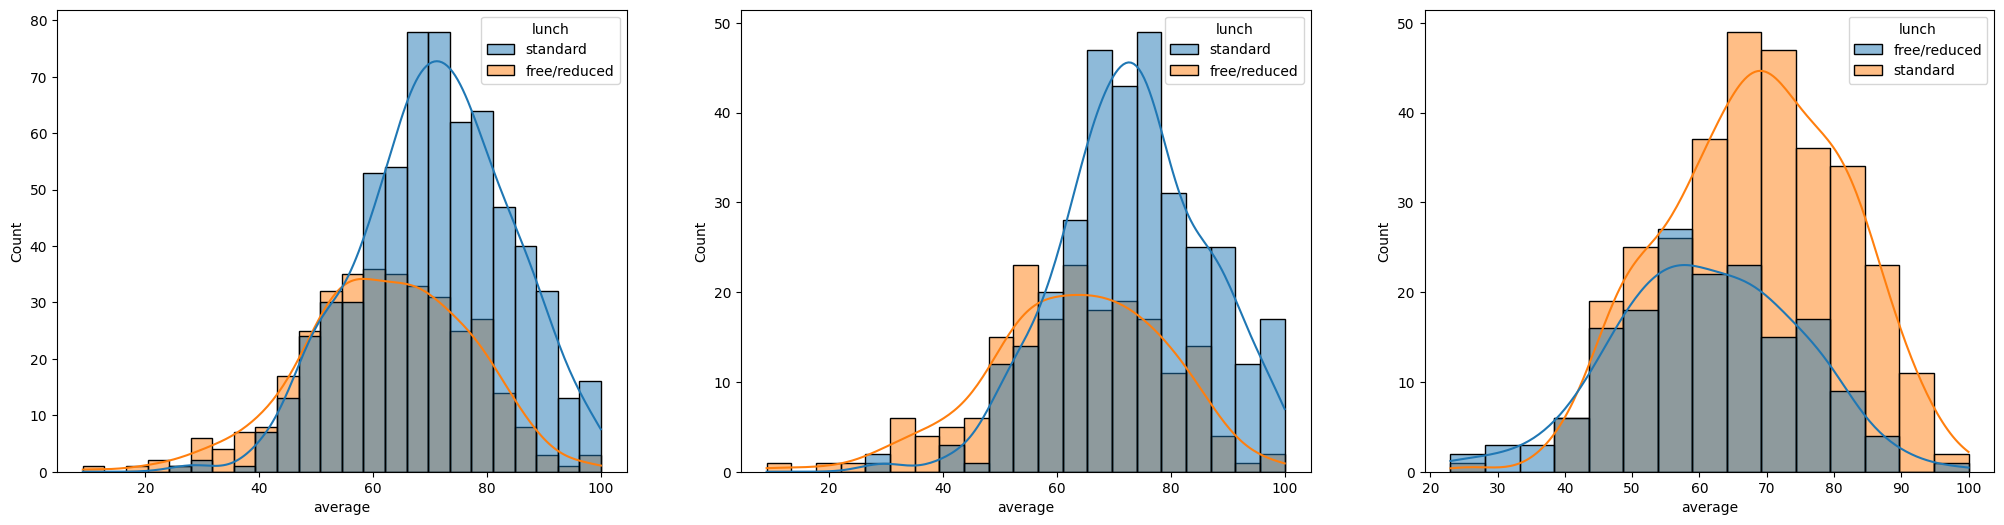

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

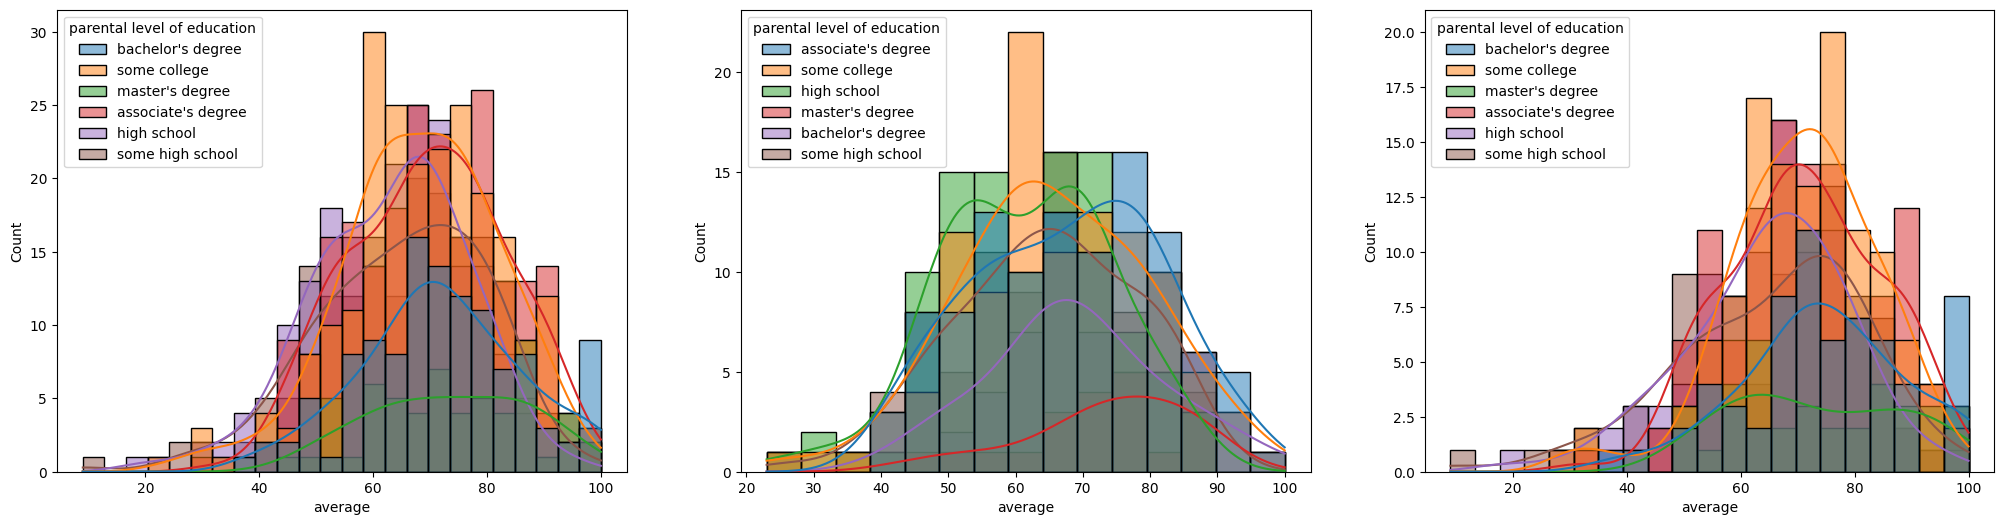

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Insight

In general parent's education don't help student perform well in exam.

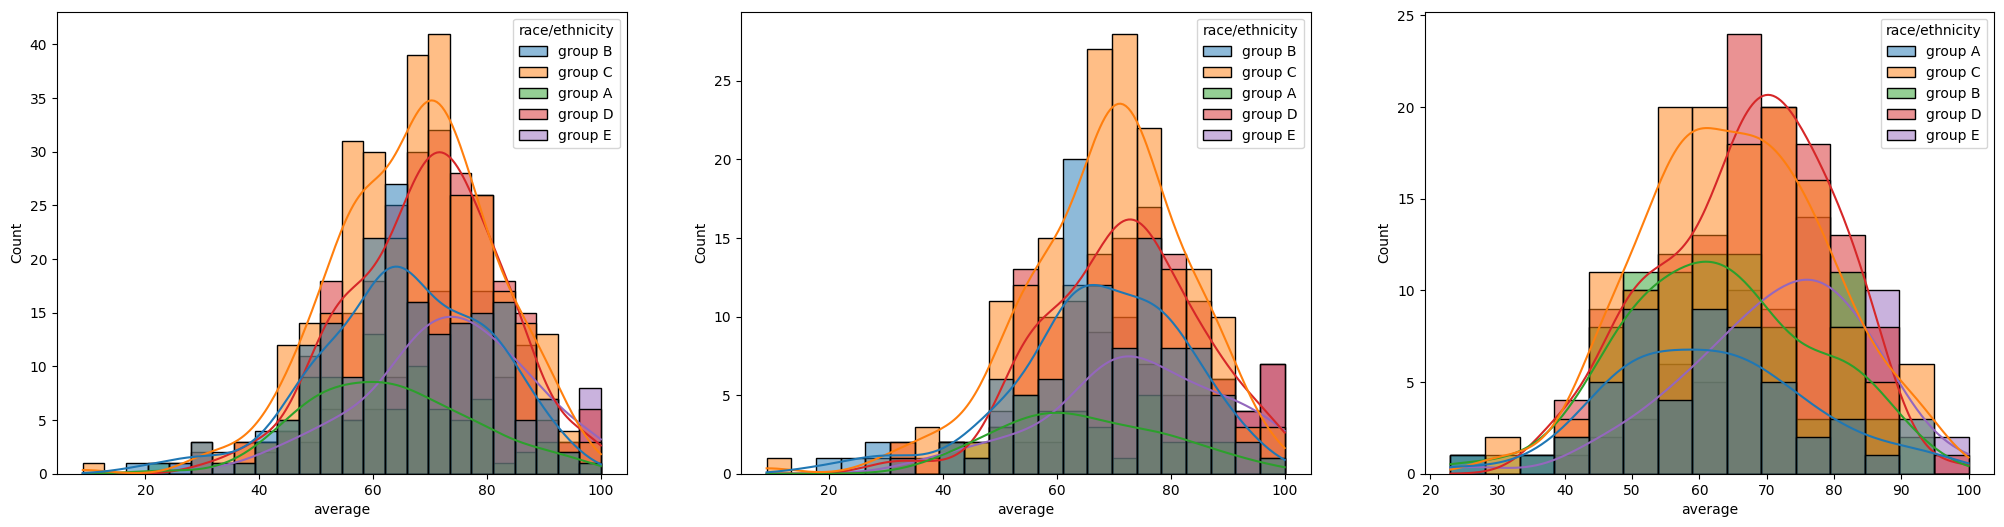

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insight

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female


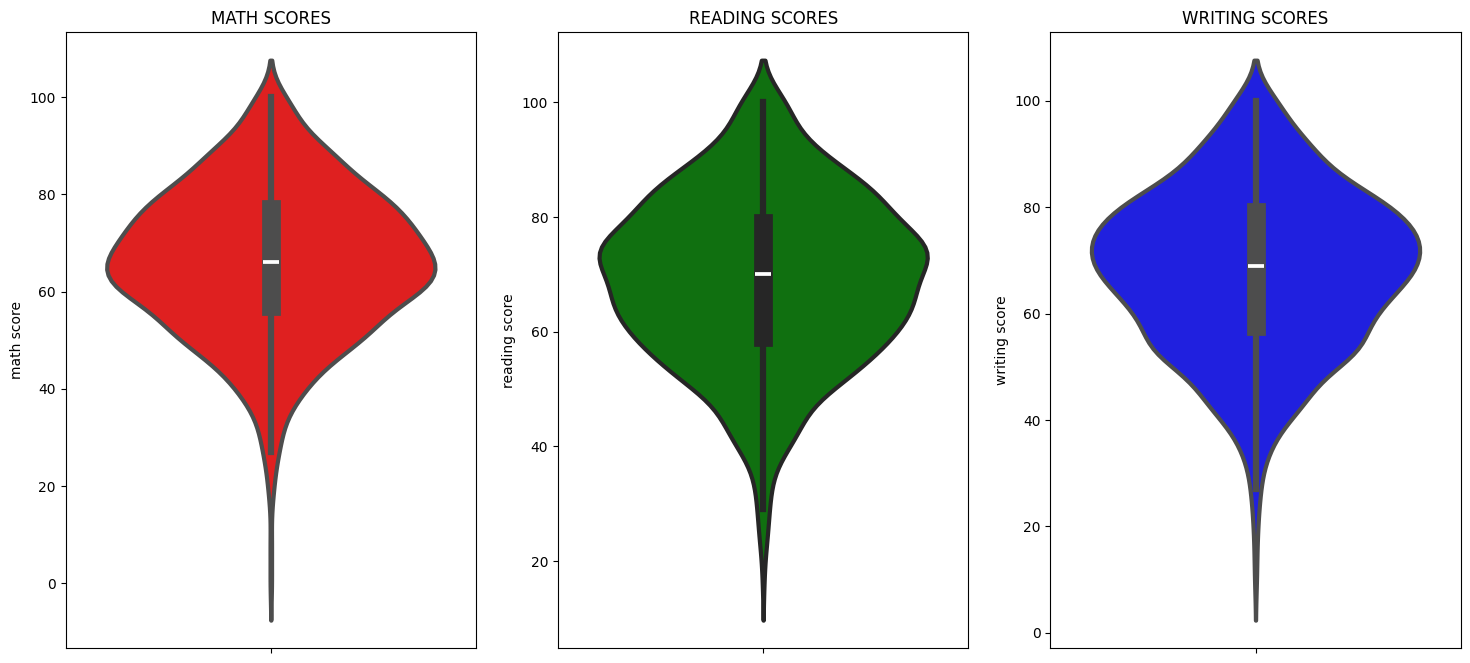

In [28]:

plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insight

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

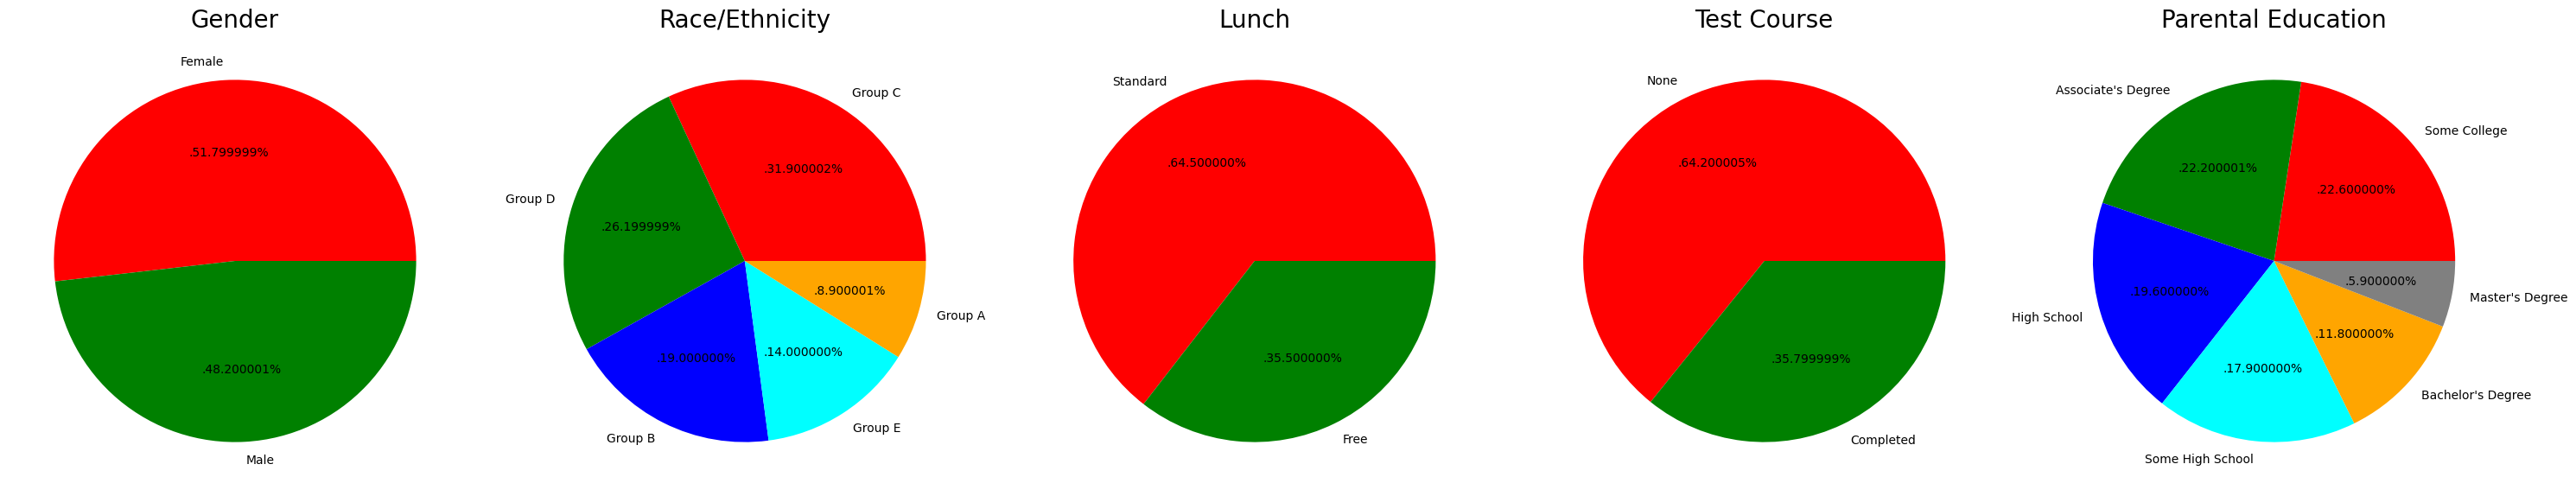

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

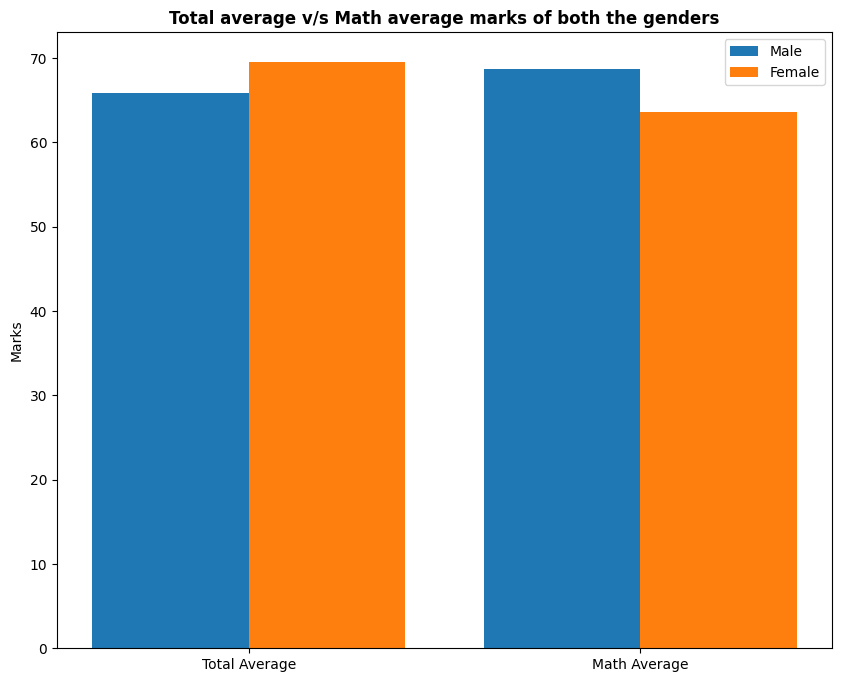

In [37]:
gender_group = df.groupby('gender')[['average','math score']].mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group.loc['female','average'], gender_group.loc['female','math score']]
male_scores = [gender_group.loc['male','average'], gender_group.loc['male','math score']]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

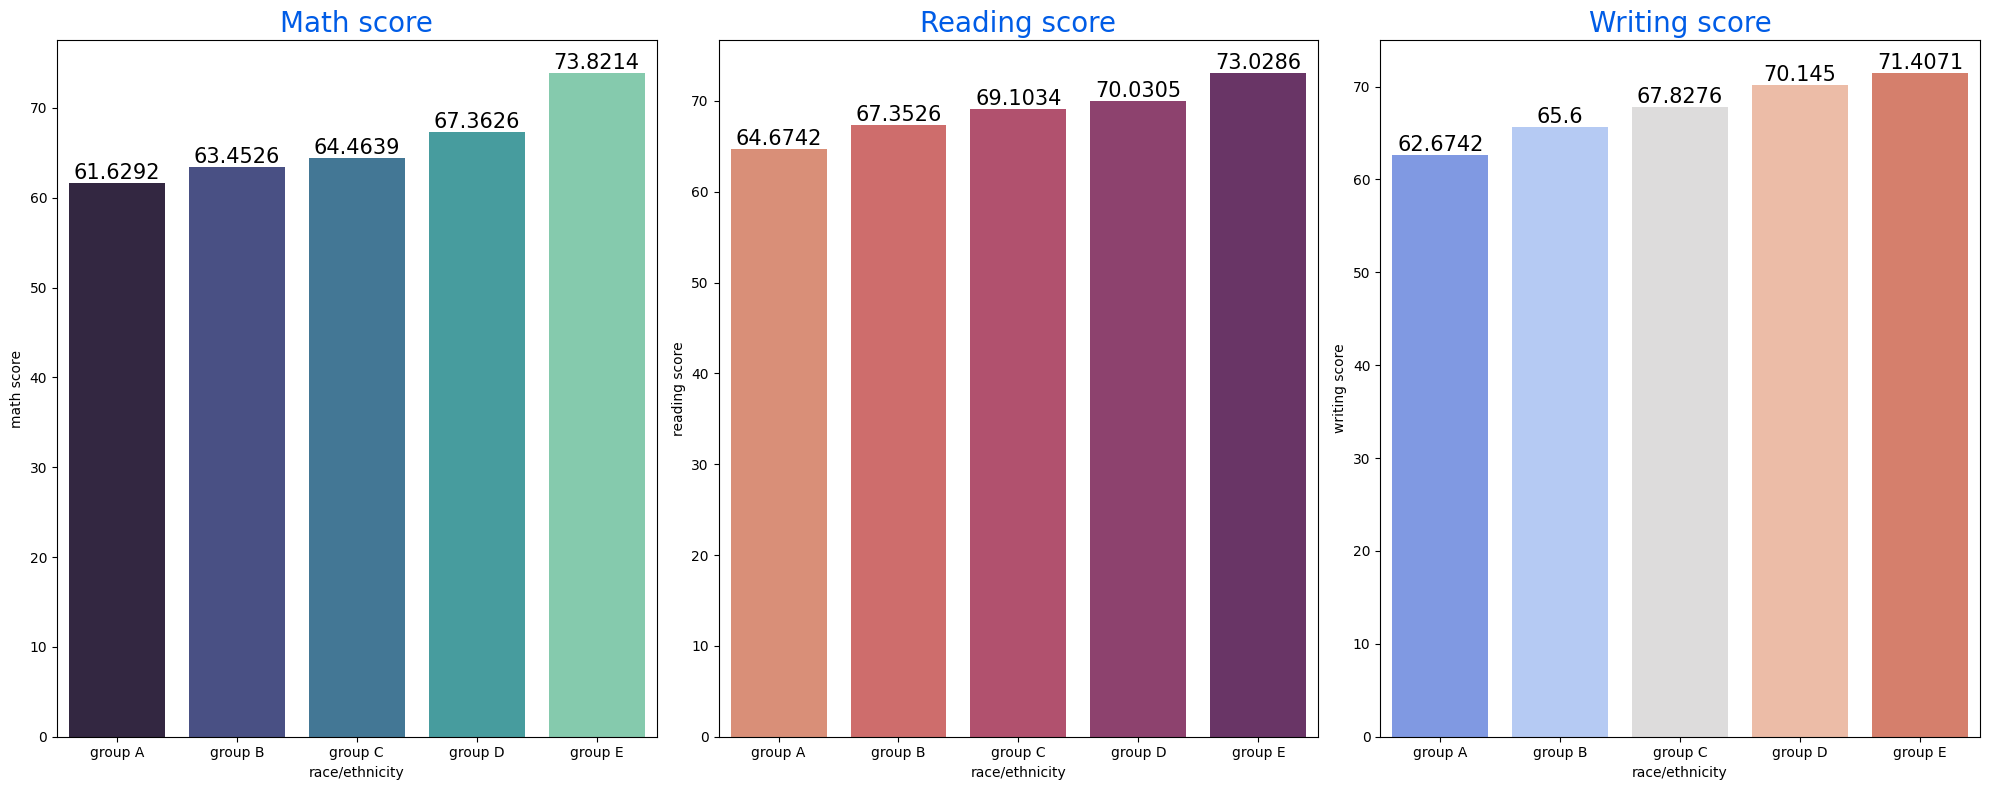

In [43]:
# Grouping and calculating mean only once
group_data = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot 1: Math Score
sns.barplot(x=group_data.index, y=group_data['math score'], palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot 2: Reading Score
sns.barplot(x=group_data.index, y=group_data['reading score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot 3: Writing Score
sns.barplot(x=group_data.index, y=group_data['writing score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

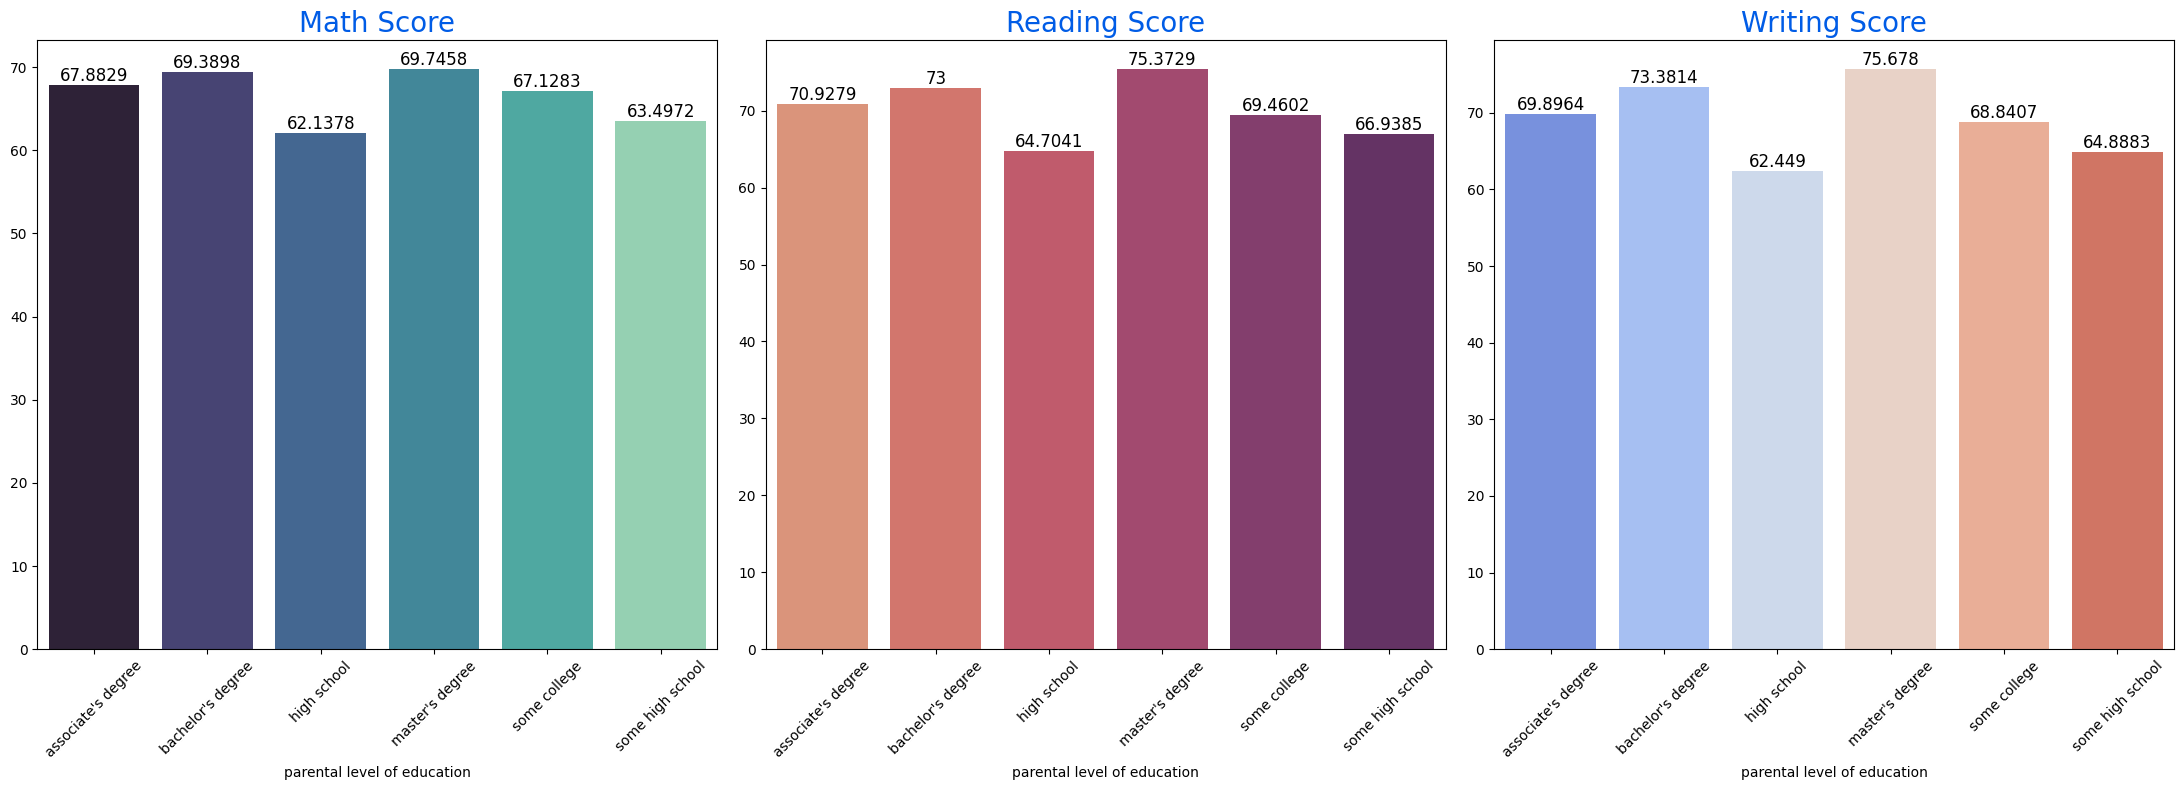

In [45]:
# Group the data by 'parental level of education'
Group_data = df.groupby('parental level of education')

# Create 3 subplots side by side
fig, ax = plt.subplots(1, 3, figsize=(22, 8))

# --- Math Score Plot ---
sns.barplot(
    x=Group_data['math score'].mean().index,
    y=Group_data['math score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# --- Reading Score Plot ---
sns.barplot(
    x=Group_data['reading score'].mean().index,
    y=Group_data['reading score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# --- Writing Score Plot ---
sns.barplot(
    x=Group_data['writing score'].mean().index,
    y=Group_data['writing score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].tick_params(axis='x', rotation=45)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

# Adjust layout
plt.tight_layout()
plt.show()



Insights

The score of student whose parents possess master and bachelor level education are higher than others.

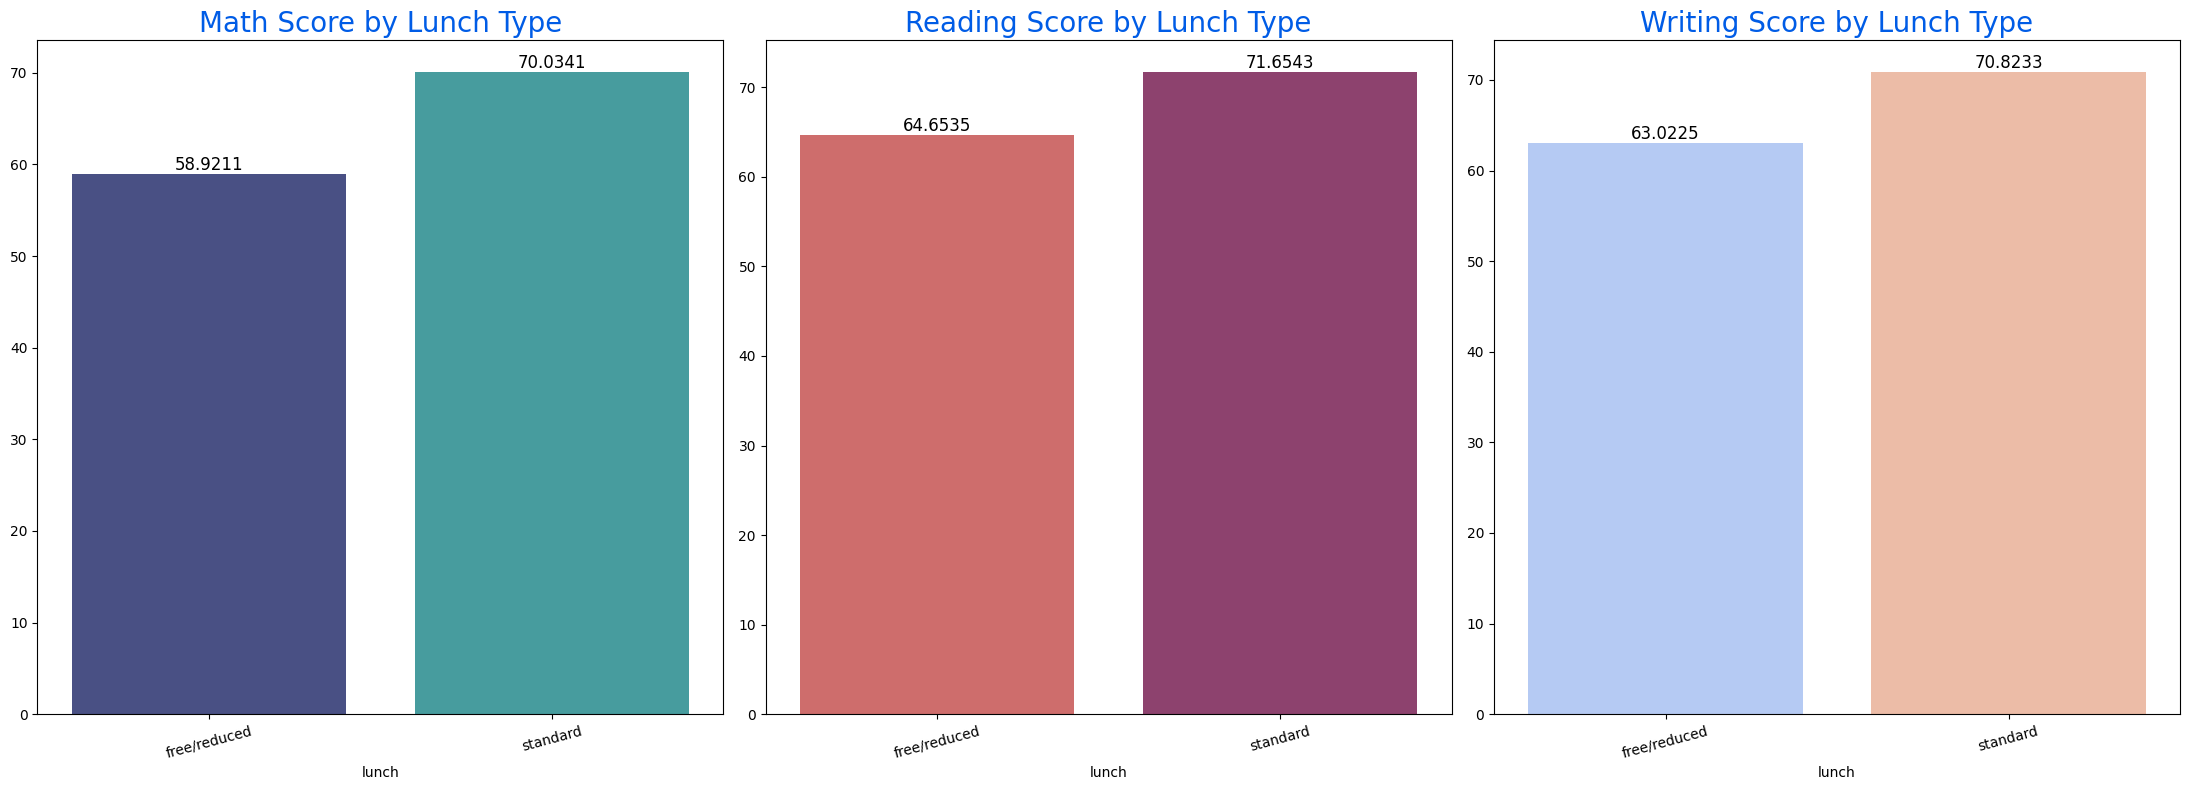

In [50]:
# Group the data by 'lunch'
Group_data = df.groupby('lunch')

# Create 3 subplots side by side
fig, ax = plt.subplots(1, 3, figsize=(22, 8))

# --- Math Score Plot ---
sns.barplot(
    x=Group_data['math score'].mean().index,
    y=Group_data['math score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score by Lunch Type', color='#005ce6', size=20)
ax[0].tick_params(axis='x', rotation=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# --- Reading Score Plot ---
sns.barplot(
    x=Group_data['reading score'].mean().index,
    y=Group_data['reading score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score by Lunch Type', color='#005ce6', size=20)
ax[1].tick_params(axis='x', rotation=15)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# --- Writing Score Plot ---
sns.barplot(
    x=Group_data['writing score'].mean().index,
    y=Group_data['writing score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score by Lunch Type', color='#005ce6', size=20)
ax[2].tick_params(axis='x', rotation=15)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

# Adjust layout
plt.tight_layout()
plt.show()


Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

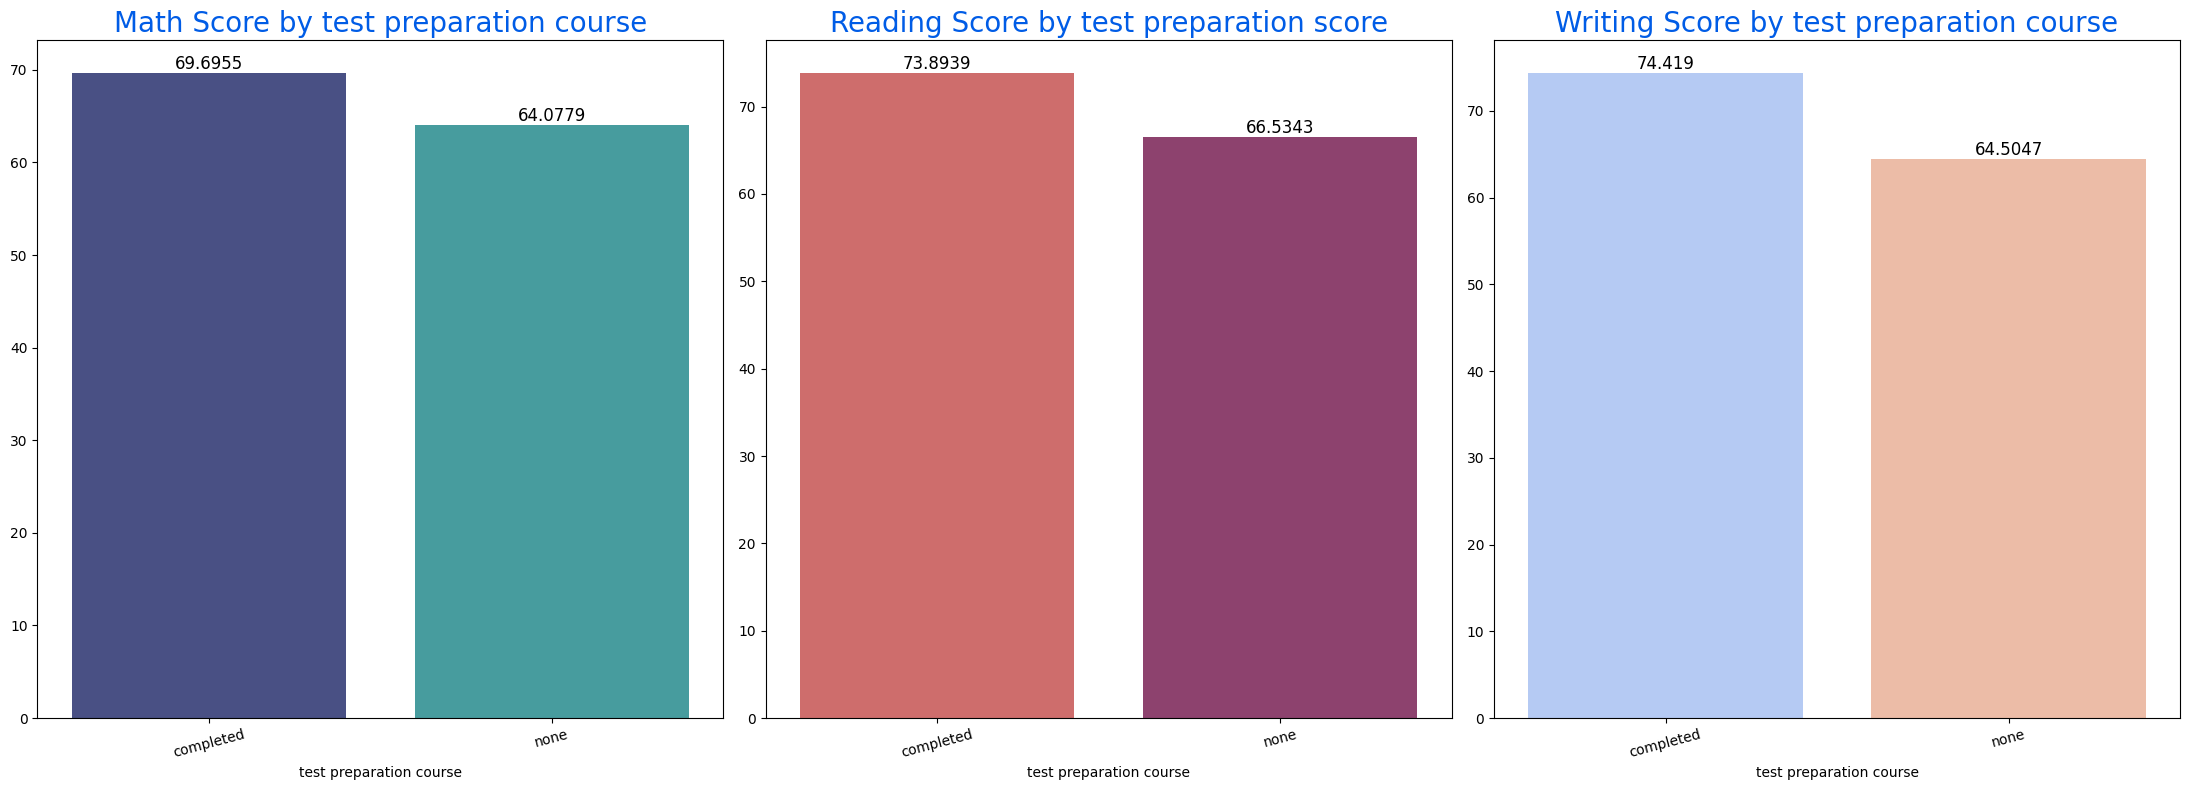

In [55]:
# Group the data by 'lunch'
Group_data = df.groupby('test preparation course')

# Create 3 subplots side by side
fig, ax = plt.subplots(1, 3, figsize=(22, 8))

# --- Math Score Plot ---
sns.barplot(
    x=Group_data['math score'].mean().index,
    y=Group_data['math score'].mean().values,
    palette='mako',
    ax=ax[0]
)
ax[0].set_title('Math Score by test preparation course', color='#005ce6', size=20)
ax[0].tick_params(axis='x', rotation=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# --- Reading Score Plot ---
sns.barplot(
    x=Group_data['reading score'].mean().index,
    y=Group_data['reading score'].mean().values,
    palette='flare',
    ax=ax[1]
)
ax[1].set_title('Reading Score by test preparation score', color='#005ce6', size=20)
ax[1].tick_params(axis='x', rotation=15)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# --- Writing Score Plot ---
sns.barplot(
    x=Group_data['writing score'].mean().index,
    y=Group_data['writing score'].mean().values,
    palette='coolwarm',
    ax=ax[2]
)
ax[2].set_title('Writing Score by test preparation course', color='#005ce6', size=20)
ax[2].tick_params(axis='x', rotation=15)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=12)

# Adjust layout
plt.tight_layout()
plt.show()


Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

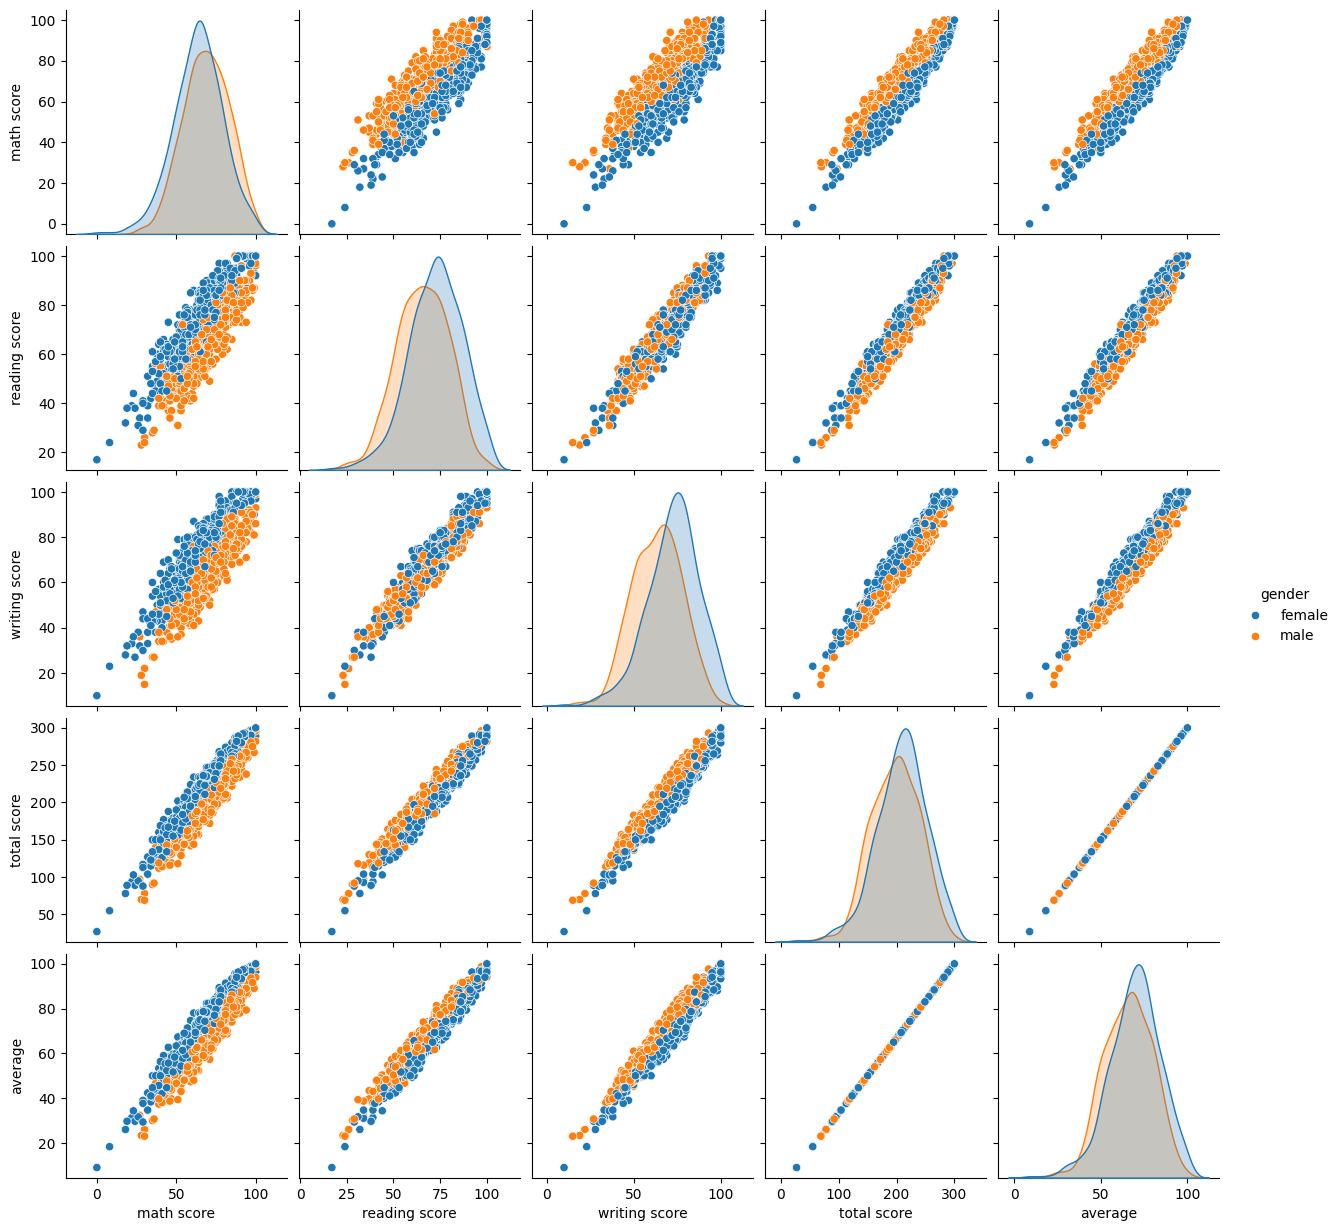

In [56]:
sns.pairplot(df,hue = 'gender')
plt.show()


Insights

From the above plot it is clear that all the scores increase linearly with each other.

Conclusions:

Student's Performance is related with lunch, racce

Females lead in pass percentage and also are top-scorers

Finishing preparation course is benefitial.